In [3]:
import json
import pathlib
import tqdm
import matplotlib.pyplot as plt
from r2handrilnet.prediction import predict_letter
from r2handrilnet.R2HandRilDataset import R2HandRilDataset
from r2handrilnet.utils import get_labels
from PIL import Image

In [4]:
def plot_result(path_to_json):
    data = open(path_to_json, 'r')
    data = json.load(data)

    plt.figure(figsize=(21, 8))
    plt.subplot(1, 2, 1)
    plt.plot(data['train_accuracy'], label='train_accuracy')
    plt.plot(data['test_accuracy'], label='test_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.subplot(1, 2, 2)
    plt.plot(data['train_loss'], label='train_loss')
    plt.plot(data['test_loss'], label='test_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    
    
def test_prediction(images, net):
    avg_prob = 0
    max_prob = 0
    min_prob = 1
    predict = 0
    classes = get_labels()
    for i in tqdm.tqdm(range(len(images))):
        img = Image.open(images[i])
        class_index, class_prob = predict_letter(img, invert=False, net=net)
        output = classes[class_index]
        target = images[i][13]
        if output == target:
            predict += 1
            avg_prob += class_prob
            if class_prob > max_prob:
                max_prob = class_prob
            if class_prob < min_prob:
                min_prob = class_prob
    
    print('Predicted images: {0}/{1}, percent: {2} %'.format(predict, len(images), predict / len(images) * 100))
    print('Min probability: ', min_prob)
    print('Avg probability: ', avg_prob / len(images))
    print('Max probability: ', max_prob)
    
    

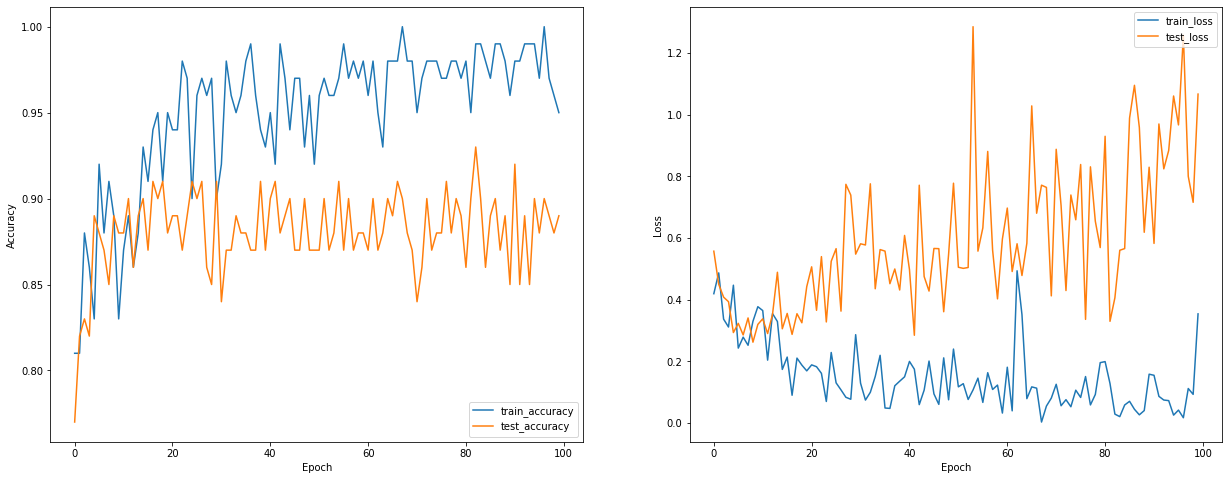

In [5]:
plot_result('log/train_plot_main.json')

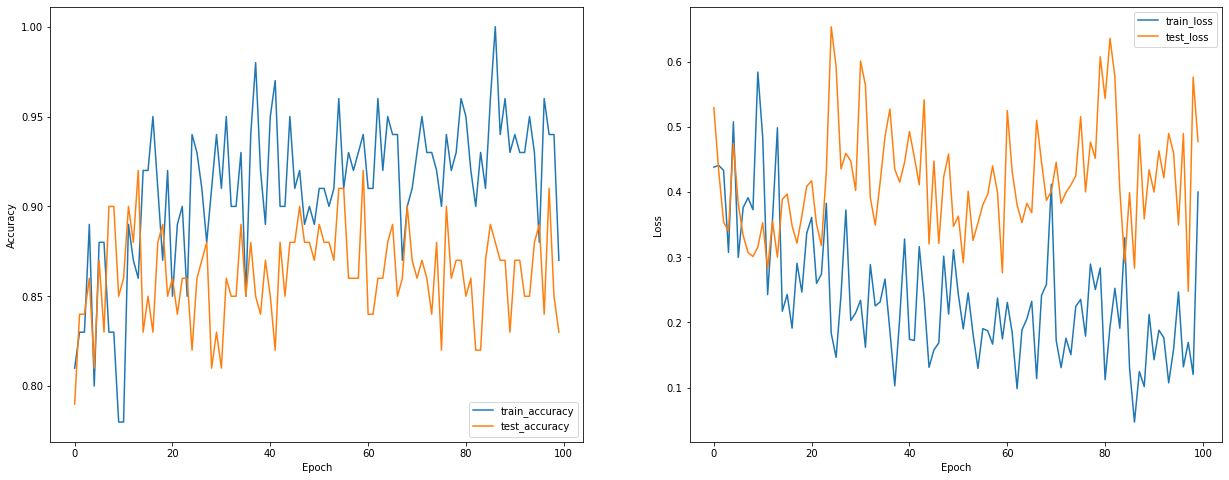

In [6]:
plot_result('log/train_plot_lesser.json')

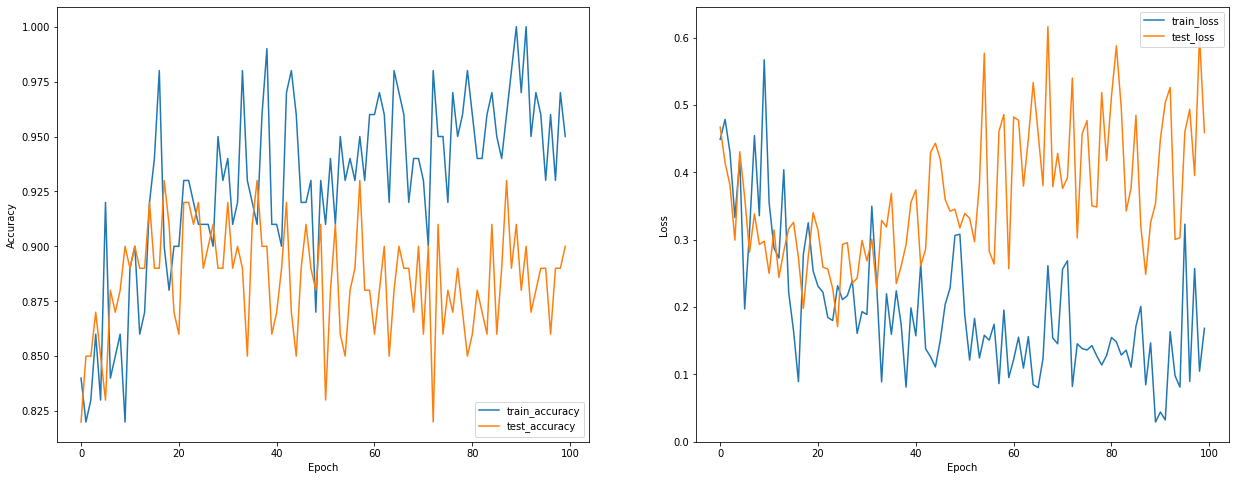

In [7]:
plot_result('log/train_plot_leaky.json')

In [8]:
root = pathlib.Path('Dataset/Test')
paths = list(root.glob('*/*'))
paths = [str(path) for path in paths]

In [6]:
print(test_prediction(paths, 'lesser'))

100%|██████████| 93000/93000 [07:47<00:00, 198.73it/s]

Predicted images: 78569/93000, percent: 84.48279569892473 %
Min probability:  0.14998044073581696
Avg probability:  0.8102050757021994
Max probability:  1.0
None


In [7]:
print(test_prediction(paths, 'main'))

100%|██████████| 93000/93000 [2:43:28<00:00,  9.48it/s]  

Predicted images: 79654/93000, percent: 85.6494623655914 %
Min probability:  0.16992707550525665
Avg probability:  0.7994396016174747
Max probability:  1.0
None


In [9]:
print(test_prediction(paths, 'leaky'))

100%|██████████| 93000/93000 [08:22<00:00, 184.97it/s]

Predicted images: 79291/93000, percent: 85.25913978494624 %
Min probability:  0.1838095337152481
Avg probability:  0.8056981522428092
Max probability:  1.0
None
